In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
game_stats = pd.read_csv('../csv/game_stats.csv')
game_stats["totalGoals"] = game_stats["home_goals"] + game_stats["away_goals"]
game_stats = game_stats[game_stats["totalGoals"] < 10]  # remove outliers 99% of games will be kept
del game_stats["Unnamed: 0"]
del game_stats["home_goals"]
del game_stats["away_goals"]
del game_stats["home_powerPlayGoals"]
del game_stats["away_powerPlayGoals"]
del game_stats["home_powerPlayOpportunities"]
del game_stats["away_powerPlayOpportunities"]

game_stats = game_stats.drop_duplicates()
game_stats = game_stats.dropna()

game_stats

,home_pim,home_shots,home_powerPlayPercentage,home_faceOffWinPercentage,home_blocked,home_takeaways,home_giveaways,home_hits,away_pim,away_shots,away_powerPlayPercentage,away_faceOffWinPercentage,away_blocked,away_takeaways,away_giveaways,away_hits,totalGoals
2,10,29,0.0,68.2,17,5,2,23,12,15,33.3,31.8,8,6,4,23,6
5,10,27,0.0,51.6,13,8,16,45,4,40,40.0,48.4,4,3,9,22,4
9,4,41,50.0,41.4,18,4,10,24,4,15,50.0,58.6,11,4,9,13,7
10,2,46,50.0,45.6,9,8,12,29,6,39,0.0,54.4,13,6,6,20,7
11,2,24,66.7,57.1,7,3,19,23,6,34,0.0,42.9,15,9,9,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21383,4,32,0.0,52.6,15,5,9,29,8,19,0.0,47.4,23,6,7,33,4
21384,4,23,0.0,43.9,23,14,19,20,6,24,50.0,56.1,17,8,7,13,3
21386,9,32,0.0,63.6,13,4,12,27,9,37,0.0,36.4,17,7,10,27,7
21390,4,37,75.0,49.0,6,3,11,9,8,21,0.0,51.0,10,3,2,17,5


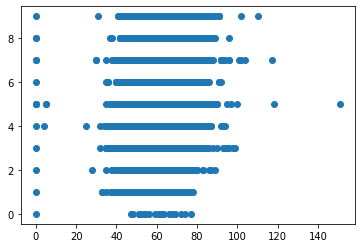

In [17]:
home_shots = (game_stats["home_shots"])
away_shots = (game_stats["away_shots"])
total_goals = (game_stats["totalGoals"])

plt.scatter(home_shots + away_shots, total_goals)

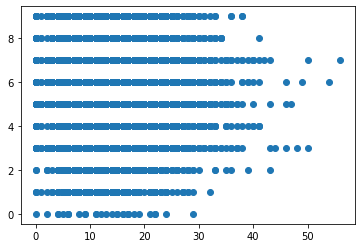

In [16]:
plt.scatter(game_stats["home_takeaways"] + game_stats["away_takeaways"] , game_stats["totalGoals"])

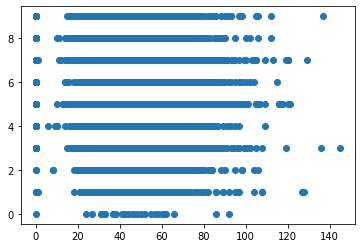

In [20]:
plt.scatter(game_stats["home_hits"] + game_stats["away_hits"] , game_stats["totalGoals"])

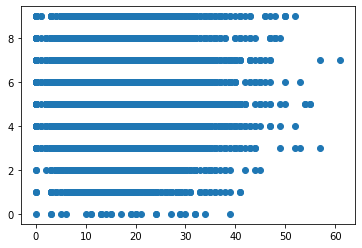

In [22]:
plt.scatter(game_stats["home_giveaways"] + game_stats["away_giveaways"] , game_stats["totalGoals"])

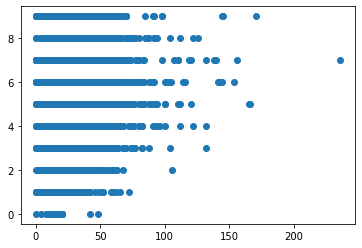

In [23]:
plt.scatter(game_stats["home_pim"] + game_stats["away_pim"] , game_stats["totalGoals"])

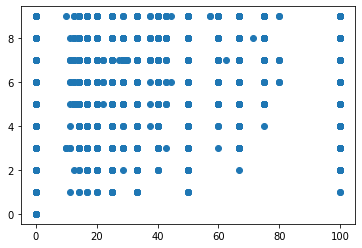

In [25]:
plt.scatter(game_stats["home_powerPlayPercentage"], game_stats["totalGoals"])

<AxesSubplot:title={'center':'Historical Distribution of Final Total Score in the NHL (n= 12459)'}, xlabel='Final Total Score', ylabel='Frequency'>

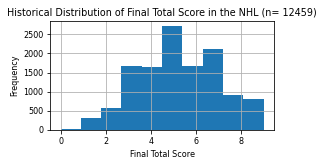

In [46]:
plt.rcParams["figure.figsize"] = (4, 2)
# set plot title size to small
plt.rcParams["font.size"] = 8
plt.title(f"Historical Distribution of Final Total Score in the NHL (n= {len(game_stats)})")
plt.ylabel("Frequency")
plt.xlabel("Final Total Score")
game_stats["totalGoals"].hist()

In [35]:
# get mean and standard deviation of game_stats["totalGoals"]
mean = game_stats["totalGoals"].mean()
std = game_stats["totalGoals"].std()

# get IQR of game_stats["totalGoals"]
iqr = game_stats["totalGoals"].quantile(0.75) - game_stats["totalGoals"].quantile(0.25)

print(mean, std, iqr)

5.302191187093667 1.9889978764755392 3.0


In [48]:
game_stats.corr()["totalGoals"]

home_pim                     0.087542
home_shots                   0.114609
home_powerPlayPercentage     0.264350
home_faceOffWinPercentage   -0.000054
home_blocked                -0.035579
home_takeaways               0.027947
home_giveaways               0.017017
home_hits                   -0.043786
away_pim                     0.088469
away_shots                   0.122245
away_powerPlayPercentage     0.243005
away_faceOffWinPercentage   -0.002987
away_blocked                -0.055242
away_takeaways               0.028610
away_giveaways               0.027930
away_hits                   -0.033793
totalGoals                   1.000000
Name: totalGoals, dtype: float64